In [ ]:
#Task:
#Write a Jupyter notebook capable of the following:
#1. Read a 500 x 500 pixel image.
#2. Produce a 'blurred' version of the PNG image (hints - Fourier low pass filter, Gaussian Filter, pixel averaging).
#3. Calculate the grey scale histogram of the original image and the blurred image and plot the histograms in single matplotlib plot. 
#4. Use scipy stats on the histograms to see if there is any statistically significant difference, print the results to the notebook
#5. Write out the blurred image as a PNG file and also write out a downscalled 250 x 250 pixel version. 

#Commit to the GitHUB repository. 
#Ensure the code is well documented, and explain what each logic block does and the expected results
#Can use any LLM but write a comment as to which ones are used in a comment at the start. 
#GitHUB Readme.md will need to be updated and the software requirements stated to run the Notebook (i.e. matplotlib, scipy, numpy... etc..)
#Email to Matt the GitHUB rep details. 

In [ ]:
#References:
#LLM used: OpenAI GPT-3.5
#500x500pixel Image produced using MidJourney AI
#Software requirements to run this notebook: numpy, matplotlib, PIL, scipy

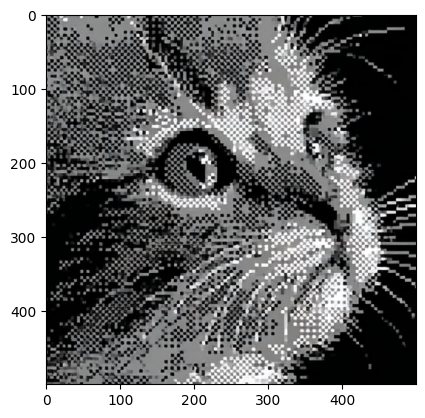

In [ ]:
#Task, Step 1 - Read a 500 x 500 pixel image
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
# Load the image
image_path = 'C:\\Users\\letit\\Downloads\\KittenForProject.png' #Insert image path here
image = Image.open(image_path)
#Show the image
plt.imshow(image)

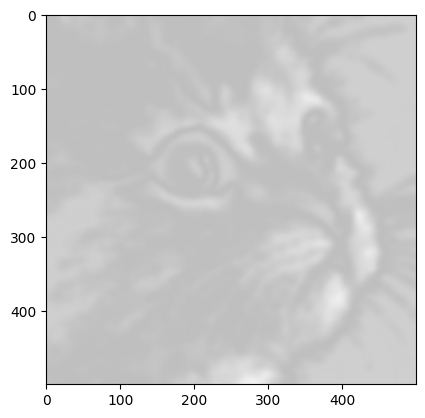

In [3]:
#Task, Step 2 - Produce a 'blurred' version of the PNG image
#import scipy for image processing
import scipy
# Import Gaussian filter from scipy.ndimage for blurring image
from scipy.ndimage import gaussian_filter
# Convert the image to a numpy array
image_array = np.array(image)
# Apply Gaussian filter to blur the image
blurred_image_array = gaussian_filter(image_array, sigma=5)
# Convert the blurred array back to an image
blurred_image = Image.fromarray(np.uint8(blurred_image_array))
# Show the blurred image
plt.imshow(blurred_image)


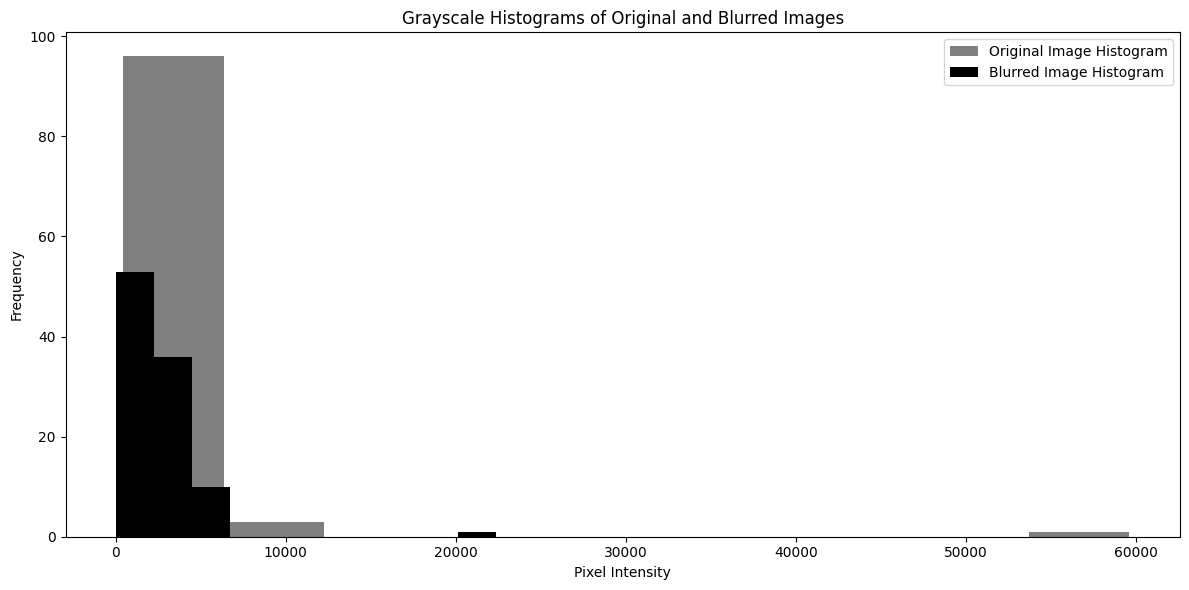

In [14]:
#Task, Step 3 - Calculate the grey scale histogram of the original image and the blurred image and plot the histograms in single matplotlib plot
#Calculate the greyscale histogram of the original image
# Convert original image to grayscale to ensure image is greyscale
original_gray = image.convert('L')
original_hist = np.histogram(np.array(original_gray).flatten(), bins=100)[0]
# Calculate the greyscale histogram of the blurred image
# Convert blurred image to grayscale to ensure image is greyscale
blurred_gray = blurred_image.convert('L')
blurred_hist = np.histogram(np.array(blurred_gray).flatten(), bins=100)[0]
# Ranges intentionally not defined in the histograms, to use the pixel intensity range and not exclude any values
# Plot the histograms
plt.figure(figsize=(12, 6))
plt.hist(original_hist, color='Grey', label='Original Image Histogram')
plt.hist(blurred_hist, color='Black', label='Blurred Image Histogram')
plt.title('Grayscale Histograms of Original and Blurred Images')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#Task, Step 4 - Use scipy stats on the histograms to see if there is any statistically significant difference
from scipy import stats
# Perform a two-sample Kolmogorov-Smirnov test to compare the two histograms
# KS test selected as it is used to determine if two samples come from the same distribution and is suitable for comparing histograms
ks_statistic, p_value = stats.ks_2samp(original_hist, blurred_hist)
# Print the results
print(f"KS Statistic: {ks_statistic}, P-value: {p_value}")
# Interpret the p-value
if p_value < 0.05:
    print("There is a statistically significant difference between the original and blurred image histograms.")
else:
    print("There is no statistically significant difference between the original and blurred image histograms.")

KS Statistic: 0.3828125, P-value: 4.16177867842939e-17
There is a statistically significant difference between the original and blurred image histograms.


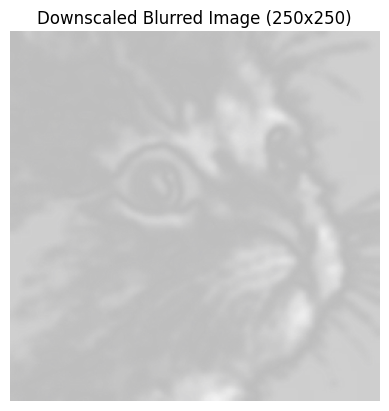

In [34]:
#Task, Step 5 - Write out the blurred image as a PNG file and also write out a downscaled 250 x 250 pixel version
# Save the blurred image as a PNG file
blurred_image.save('blurred_image.png')
# Downscale the blurred image to 250 x 250 pixels
downscaled_image = blurred_image.resize((250, 250))
# Save the downscaled image
downscaled_image.save('downscaled_blurred_image.png')
# Display the downscaled image
plt.imshow(downscaled_image)
plt.title('Downscaled Blurred Image (250x250)')
plt.axis('off')
plt.show()